In [2]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


### 분석

In [41]:
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리')
df_fin = pd.read_csv('2019_타자_팀별_수비점수(March, kWAR, AHP), 주성분(P1, P2, P3)_Scaled_SM, 20연봉, 승률.csv', encoding = 'cp949')
df_fin.index = df_fin['Unnamed: 0']
del df_fin['Unnamed: 0']
df_fin

,March_score,kWAR_score,AHP_score,P1,P2,P3,20연봉,승률
Unnamed: 0,,,,,,,,
두산,44150.924,4790.142,1259.341,362.590461,1237.774294,-188.630502,452100,0.615
KT,43859.358,4754.125,1250.903,336.959632,1154.680794,-180.585478,348700,0.500
키움,43776.818,4743.975,1248.977,362.061583,1239.546146,-192.241449,439700,0.601
KIA,41878.145,4562.400,1211.747,299.008043,1022.251597,-157.162328,426900,0.437
NC,45377.503,4893.407,1279.389,402.543461,1375.226050,-210.547749,564100,0.514
LG,44233.028,4798.749,1261.255,337.683241,1156.795911,-180.705602,486100,0.552
삼성,43192.153,4660.533,1211.372,311.800548,1075.971257,-176.780665,365500,0.420
한화,43364.236,4698.880,1238.058,288.499872,988.926445,-155.773216,302300,0.403
롯데,44110.239,4790.569,1271.978,280.243400,958.068716,-147.881565,716100,0.340


In [37]:
# ## 표준화 하나마나 결과가 똑같음
# sc_df_fin = pd.DataFrame(StandardScaler().fit_transform(df_fin))
# sc_df_fin.columns = df_fin.columns
# sc_df_fin

In [38]:
# sc_df_fin.index = df_fin.index
# sc_df_fin['20연봉'] = np.log(df_fin['20연봉'])
# #sc_df_fin['FA유무'] = df_fin['FA유무']
# sc_df_fin

In [43]:
# sc_df_fin.index = df_fin.index
df_fin['20연봉'] = np.log(df_fin['20연봉'])
#df_fin['FA유무'] = df_fin['FA유무']
df_fin

,March_score,kWAR_score,AHP_score,P1,P2,P3,20연봉,승률
Unnamed: 0,,,,,,,,
두산,44150.924,4790.142,1259.341,362.590461,1237.774294,-188.630502,13.021659,0.615
KT,43859.358,4754.125,1250.903,336.959632,1154.680794,-180.585478,12.761967,0.500
키움,43776.818,4743.975,1248.977,362.061583,1239.546146,-192.241449,12.993848,0.601
KIA,41878.145,4562.400,1211.747,299.008043,1022.251597,-157.162328,12.964305,0.437
NC,45377.503,4893.407,1279.389,402.543461,1375.226050,-210.547749,13.242987,0.514
LG,44233.028,4798.749,1261.255,337.683241,1156.795911,-180.705602,13.094170,0.552
삼성,43192.153,4660.533,1211.372,311.800548,1075.971257,-176.780665,12.809022,0.420
한화,43364.236,4698.880,1238.058,288.499872,988.926445,-155.773216,12.619175,0.403
롯데,44110.239,4790.569,1271.978,280.243400,958.068716,-147.881565,13.481575,0.340


In [16]:
# os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\논문\야구데이터\수비율\전처리')
# sc_df_fin.to_csv('2019_타자_수비점수(March, kWAR, AHP), 주성분(GEN, POW, SPD)_3, 연차, FA - 표준화, 로그.csv', encoding = 'cp949')

#### 수비점수 kWAR

In [47]:
x = df_fin.drop(['March_score', 'AHP_score', '승률'], axis = 1)
#y = np.log(np.log(sc_df_fin['20연봉']))   ## 로그 3번
#y = np.log(df_fin['20연봉'])           ## 로그 2번
y = df_fin['승률']                    ## 로그 1번

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[0.45173575 0.59703372]
r2score =  -0.7109704078840189
mse =  0.010950210610457718
rmse =  0.10464325401313607
adjustedr2 =  -2.8496834177390427


In [231]:
LR.coef_

array([ 0.01187302,  0.06308929, -0.01427472,  0.00376971,  0.03556015,
        0.03310868])

In [11]:
LR.score(x, y)

0.06066513519558492

In [13]:
y_prediction_2 = LR.predict(x)

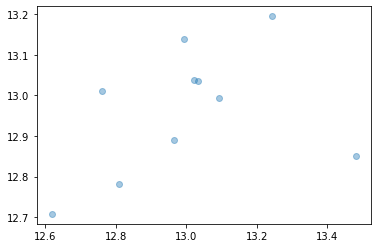

In [14]:
plt.scatter(y, y_prediction_2, alpha=0.4)

#### 수비점수 March

In [18]:
x = df_fin.drop(['kWAR_score', 'AHP_score', '20연봉'], axis = 1)
y = sc_df_fin['20연봉']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.69488564  9.58131312  9.40900414  9.88067347 11.10460226 10.45442983
 10.12837247 10.34005096 10.09542711 11.17779815]
r2score =  0.7869734129811277
mse =  0.08548192113602851
rmse =  0.2923729145047956
adjustedr2 =  0.756541043407003


#### March 수비점수만 회귀분석 --> 쓰레기

In [11]:
x = sc_df_fin.drop(['kWAR_score', 'AHP_score', '20연봉', '연차', 'P1', 'P2', 'P3'], axis = 1)
y = sc_df_fin['20연봉']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.26922532 10.26232538 10.40411103 10.20793174 10.39389317 10.39883391
 10.34688834 10.37399766 10.40031198 10.40333712]
r2score =  -0.010691769971804987
mse =  0.4055638095817072
rmse =  0.6368389196505716
adjustedr2 =  -0.054634890405361736


#### AHP_score

In [19]:
x = sc_df_fin.drop(['kWAR_score', '20연봉', 'March_score'], axis = 1)
y = sc_df_fin['20연봉']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.54590722  9.58276188  9.42316868  9.78983902 11.10573652 10.4289413
 10.07334813 10.30165592 10.12976207 11.14141213]
r2score =  0.7851725061067008
mse =  0.08620457731508777
rmse =  0.2936061602131123
adjustedr2 =  0.7544828641219437


#### 수비점수 3개 다 넣어서

In [108]:
x = sc_df_fin.drop(['20연봉'], axis = 1)
y = np.log(df_fin['20연봉'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(y_prediction)
print('r2score = ', r2_score(y_test, y_prediction))
print('mse = ', mean_squared_error(y_test,y_prediction))
print('rmse = ', np.sqrt(mean_squared_error(y_test,y_prediction)))
## adjusted R2 score
r2 = r2_score(y_test, y_prediction)
n = len(x)   ## 관측값의 개수
k = len(x.columns)   ## 독립변수의 개수
ar2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('adjustedr2 = ', ar2)

[10.62978222  9.33862777  9.34898457  9.83104469 11.07516848 10.47363078
  9.94943327 10.34146441 10.2043456  11.46837917]
r2score =  0.715508716524185
mse =  0.11415880899323008
rmse =  0.33787395429838935
adjustedr2 =  0.658610459829022


### 그래프

In [57]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab


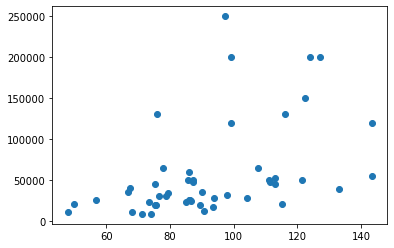

In [60]:
plt.scatter(df_fin['GEN'], df_fin['20연봉'])

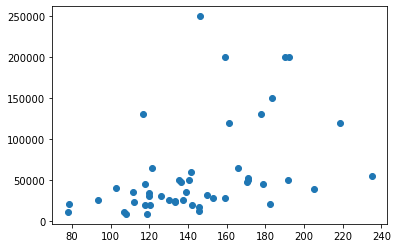

In [61]:
plt.scatter(df_fin['POW'], df_fin['20연봉'])

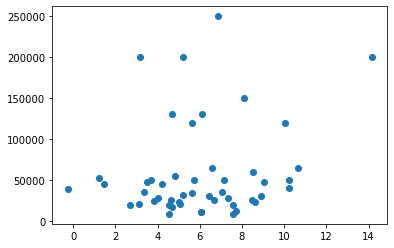

In [62]:
plt.scatter(df_fin['SPD'], df_fin['20연봉'])

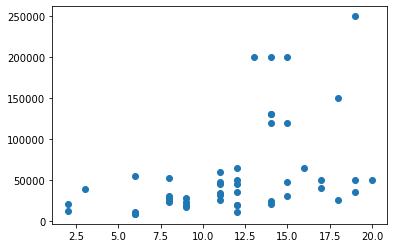

In [67]:
pylab.scatter(df_fin['연차'], df_fin['20연봉'])